# Spaceship Titanic

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing data 
data =  pd.read_csv('train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Basic Data Exploration

1. Look at summary statistics
2. Select relevant columns
3. Evaluate Null Values


In [4]:
data.shape

(8693, 14)

In [5]:
# split the data into numerical and categorical dataframes
numerical_data = data.select_dtypes(include=[np.number])
numerical_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
categorical_data = data.select_dtypes(include='object')
categorical_data.describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# Checking Value Counts
data['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [9]:
data['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [10]:
data['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [11]:
# Dropping the columns we dont need
data.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [12]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [13]:
# checking the null values
data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [14]:
# replacing missing values with the median 
col = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck', 'Age']
for i in col:
    med = data[i].median()
    data[i].replace(np.nan, med, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_26324\1675317952.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].replace(np.nan, med, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_26324\1675317952.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [15]:
# replacing missings values with the most frequesnt in column
mod_dest = data['Destination'].mode().iloc[0]
data['Destination'].replace(np.nan, mod_dest, inplace=True)

mod_home = data['HomePlanet'].mode().iloc[0]
data['HomePlanet'].replace(np.nan, mod_home, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_26324\2470625862.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Destination'].replace(np.nan, mod_dest, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_26324\2470625862.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [16]:
col = ['CryoSleep','VIP']

for i in col:
    data[i] =  data[i].apply(lambda x:1 if x==True else 0)

In [17]:
data[['Deck', 'Num', 'Side']] = data['Cabin'].str.split(pat='/', expand=True)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [18]:
data.drop('Num', axis=1, inplace=True)

In [19]:
# Now that we have extracted cabin data we dont need this column anymore
data.drop('Cabin', axis=1, inplace=True)

In [20]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,S


In [21]:
col = ['Deck', 'Side']

for i in col:
    mod = data[i].mode().iloc[0]
    data[i].replace(np.nan, mod, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_26324\3311114875.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].replace(np.nan, mod, inplace=True)


In [22]:
data.isnull().sum()


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

## Exploratory Data Analysis


<Axes: >

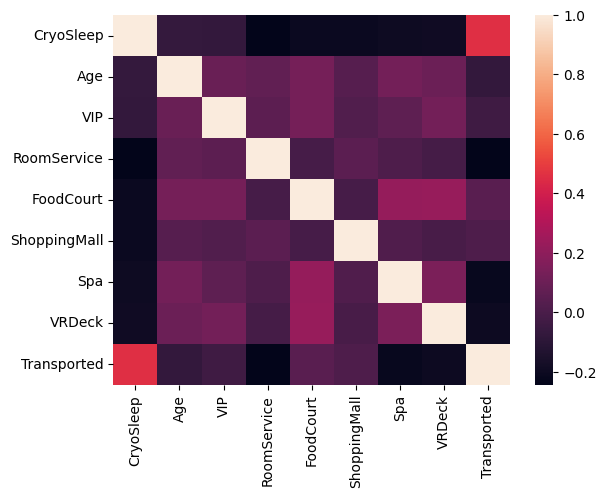

In [23]:
data['Transported'] =  data['Transported'].apply(lambda x:1 if x==True else 0)
numerical_data = data.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr())

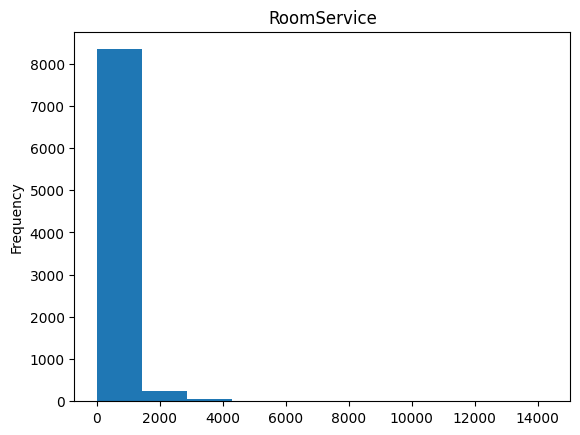

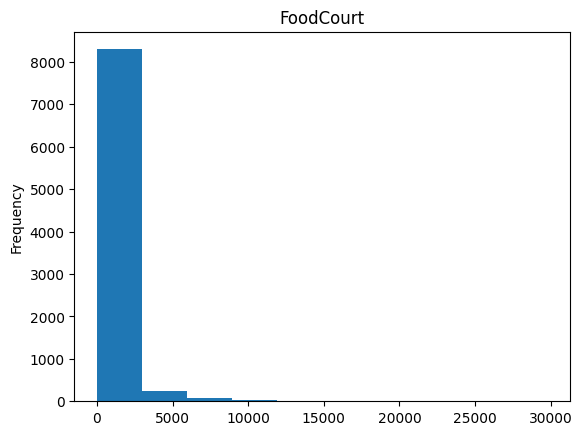

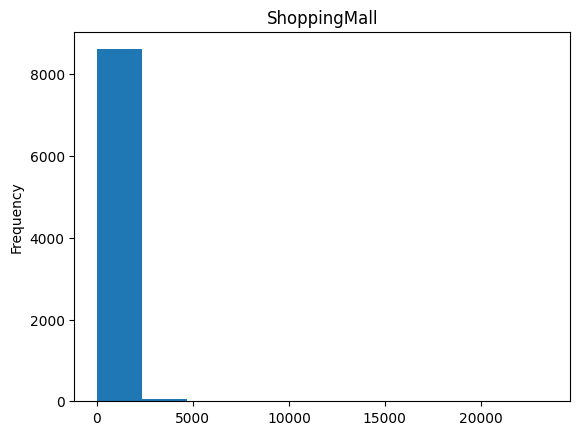

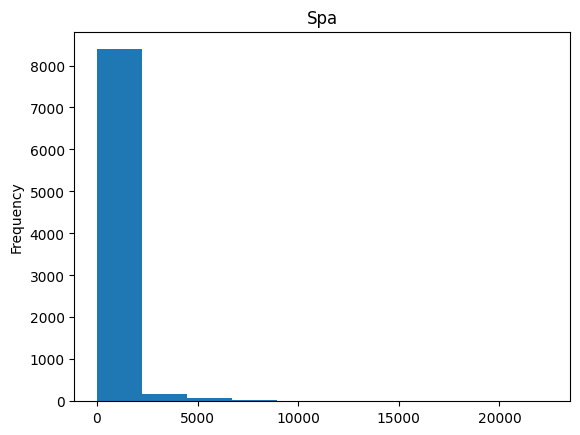

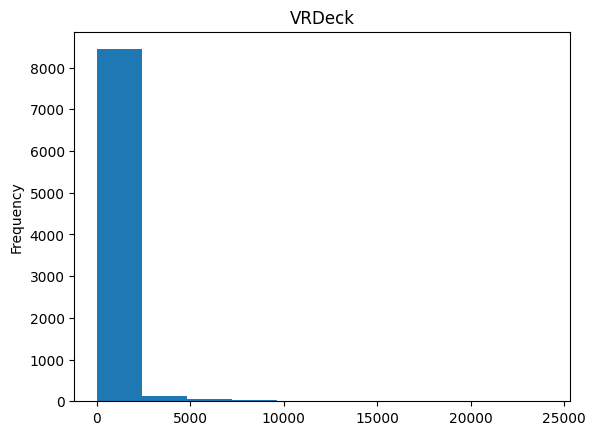

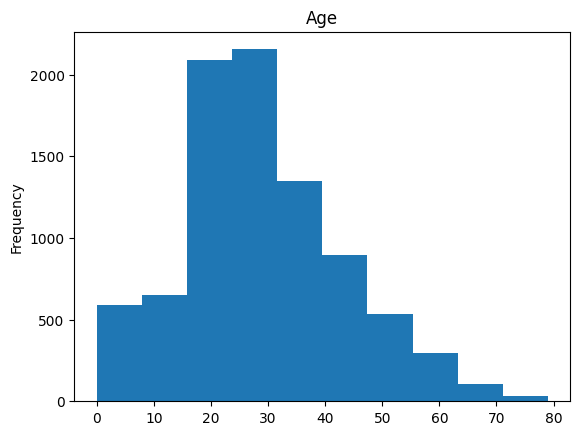

In [29]:
# Taking a look at the distribution for the numerical data
col = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck', 'Age']
for i in col:
    data[i].plot(kind='hist')
    plt.title(i)
    plt.show()

In [24]:
categorical_data = data.select_dtypes(include='object')
pd.pivot_table(data, index='HomePlanet', columns='Destination', values = 'Transported', aggfunc='count' )

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,721,728,3354
Europa,886,19,1226
Mars,193,49,1517


In [25]:
pd.pivot_table(data, index='Deck', columns='Side', values = 'Transported', aggfunc='count' )

Side,P,S
Deck,,
A,117,139
B,353,426
C,341,406
D,248,230
E,429,447
F,1438,1555
G,1276,1283
T,4,1


In [26]:
df_vip = data.groupby('VIP')['Transported'].sum().reset_index()
df_vip

,VIP,Transported
0,0,4302
1,1,76


<Axes: xlabel='CryoSleep', ylabel='Transported'>

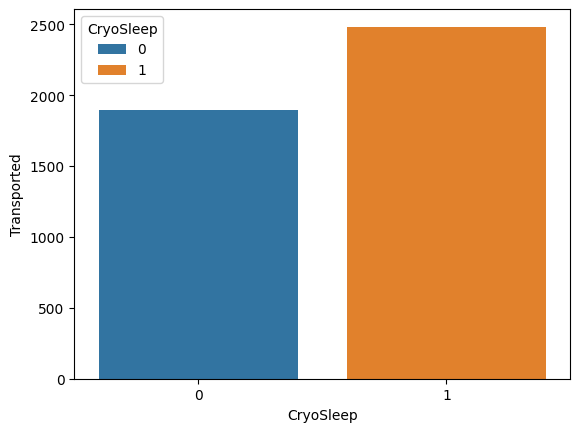

In [27]:
df_cs = data.groupby('CryoSleep')['Transported'].sum().reset_index()
sns.barplot(data=df_cs, x='CryoSleep', y='Transported', hue='CryoSleep')

## Feature Engineering 
* Encode Data
* Scale Data


In [31]:
# Using the label encoder to encode the categorical data
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

enc_col = ['HomePlanet', 'Destination', 'Deck', 'Side']
for i in enc_col:
    data[i] = enc.fit_transform(data[i])

In [33]:
# Scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_col = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i in sc_col:
    data[i] = sc.fit_transform(data[[i]])


In [34]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,0.711945,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,1,0
1,0,0,2,-0.334037,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,5,1
2,1,0,2,2.036857,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,0,1
3,1,0,2,0.293552,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,0,1
4,0,0,2,-0.891895,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,5,1


# Model Development
* Import Libraries 
* Make models


In [36]:
# importing models libries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb


In [37]:
# making the labels and the target
X = data.drop('Transported', axis=1)
y = data['Transported']

In [38]:
print(X.shape)
print(y.shape)

(8693, 12)
(8693,)


In [43]:
# svm model
svm_cl = SVC(kernel='rbf', random_state=5)
svm_score = cross_val_score(svm_cl, X, y, cv=3)
print(svm_score.mean())

0.7884516232057166


In [53]:
# knn model
knn_cl = KNeighborsClassifier(n_neighbors=5)
knn_score = cross_val_score(knn_cl, X, y, cv=3)
print(knn_score.mean())

0.7645244173886998


In [47]:
# XGB Classifier
xgb_cl = xgb.XGBClassifier()
xgb_score = cross_val_score(xgb_cl, X, y, cv=3)
print(xgb_score.mean())

0.7939728707239325


In [49]:
# Decision Tree
tree_cl = DecisionTreeClassifier(criterion='entropy')
tree_score = cross_val_score(tree_cl, X, y, cv=3)
print(tree_score.mean())

0.7393312565079461


In [50]:
# logistic Regression
lr_cl = LogisticRegression()
lr_score = cross_val_score(lr_cl, X, y, cv=5)
print(lr_score.mean())

0.783964303651888


In [59]:
model_scores= {'Model':['K Nearest Neighbour', 'Support Vector Classifier', 'XGBoost Classifier', 'Decision Tree', 'Logistic Regression'], 'Scores' :[knn_score.mean()*100, svm_score.mean()*100, xgb_score.mean()*100, tree_score.mean()*100, lr_score.mean()*100]}
scores = pd.DataFrame.from_dict(model_scores)
scores


,Model,Scores
0,K Nearest Neighbour,76.452442
1,Support Vector Classifier,78.845162
2,XGBoost Classifier,79.397287
3,Decision Tree,73.933126
4,Logistic Regression,78.396430
